# 08.1-Logistic-regression-coefficients
# 08.2-Linear-Regression-coefficients
# 08.3-Regression-coefficients-and-regularisation
# 08.4-Basic-methods-plus-coefficients-pipeline

- REGRESSION COEFFICIENTS
- y = β0 + β1X1 + β2X2 + … + βnXn
- the coefficients of the predictors (the bs) are directly proportional to how much that feature contributes to the final value of y
- Coefficients in linear models depend on a few assumptions:
    - • Linear relationship between predictor (X) and outcome (Y)
    - • Xs are independent (predictors are independant from each other)
    - • Xs are not correlated to each other (no-multicollinearity)
- In addition, for direct coefficient comparison Xs should be in the same scale (0 and 1) (-1 and 1)
- magnitude of the coefficient influenced as well by the regularization

## Logistic Regression Coefficients

Linear regression predicts a quantitative response Y on the basis of predictor variables X1, X2, ... Xn. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**The magnitude of the coefficients is directly influenced by the scale of the features**. Therefore, to compare coefficients across features, it is important that all features are on a similar scale. This is why normalisation is important for variable importance and feature selection in linear models.

Linear Regression makes the following assumptions:

- There is a linear relationship betweent the predictors Xs and the outcome Y

- The residuals follow a normal distribution centered at 0

- There is little or no multicollinearity among predictors (Xs should not be linearly related to one another)

- Homoscedasticity (variance should be the same)

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the "noise" or random disturbance in the relationship between the independent variables (Xs) and the dependent variable (Y)) is the same across all values of the independent variables.

Therefore, there are a lot of assumptions that need to be met in order to make a fair comparison of the features by using only their regression coefficients.

In addition, these coefficients may be penalised by regularisation, therefore being smaller than if we were to compare the relationship of each feature with the target individually.

Having said this, you can still select features based on linear regression coefficients, provided you keep all of these in mind at the time of analysing the outcome.

Personally, this is not my feature selection method of choice, although I find it useful to interpret the output of the model.

I will demonstrate how to select features based in a regression and a classification scenario.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
data = pd.read_csv('../dataset_2.csv')
print(data.shape)
data.head(1)

(50000, 109)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.53271,3.280834,17.982476,4.404259,2.34991,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417


In [5]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [6]:
# we will scale the variables, so we fit a scaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
# here I will do the model fitting and feature selection altogether in 2 lines of code
# first I specify the Logistic Regression model, here I select the Ridge Penalty (l2)(it is the default parameter in sklearn)
# remember that here I want to evaluate the coefficient magnitud itself and not whether lasso shrinks coefficients to zero
# ideally, I want to avoid regularisation at all, so the coefficients are not affected (modified) by the penalty of the regularisation
# In order to do this in sklearn, I set the parameter C really high which is basically like fitting a non-regularised logistic regression
# Then I use the selectFromModel object from sklearn to automatically select the features
# set C to 1000, to avoid regularisation
sel_ = SelectFromModel(LogisticRegression(C=1000, penalty='l2', max_iter=300, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, max_iter=300,
                                             random_state=10))

In [8]:
# this command let's me visualise those features that were kept.
# sklearn will select those features which coefficients are greater than the mean of all the coefficients.
# it compares absolute values of coefficients. More on this in a second.
sel_.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False])

In [9]:
# let's add the variable names and order it for clearer visualisation and then let's sum the number of selected features
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

33

In [10]:
# with the parameter coef_ we access the coefficients of the variables for the linear regression (for all the 108 variables)
sel_.estimator_.coef_

array([[ 1.15831256e-02, -1.34569083e-02,  1.08602795e-01,
         2.64582136e-02,  4.34579566e-02, -2.46507047e-02,
        -3.34178120e-02, -6.33818523e-03,  2.32420016e-02,
        -9.83088417e-03,  8.03535225e-02,  5.28092343e-02,
        -3.75249450e-02,  1.92459310e-02, -3.86498846e-02,
         2.47559840e-02,  1.36985247e-02,  5.41073223e-02,
         1.30253511e-02,  1.54156470e-02,  1.42120280e-01,
         2.46511006e-02, -1.28700523e-01,  1.26354595e-01,
         1.43518033e-02,  6.35229718e-02,  2.75631040e-02,
        -8.88321926e-04, -1.43302661e-02, -1.47731986e-02,
         6.87360250e-03, -1.86575445e-01, -1.01186898e-01,
         3.27882534e-02,  1.18988951e-02,  4.34606561e-02,
         1.95734999e-02,  4.49074701e-02,  7.95394192e-02,
         7.00259818e-02, -3.50844227e-03, -1.98768439e-03,
        -5.34219172e-02,  5.65321463e-02,  3.63819670e-03,
         3.05840314e-02,  4.92095931e-03,  4.26608895e-01,
         2.14719417e-02,  7.40577190e-02,  1.50669239e-0

In [11]:
# as SelectFromModel selects coefficients above the mean of all coefficients, let's calculate first the mean
sel_.estimator_.coef_.mean()

0.011992672590227613

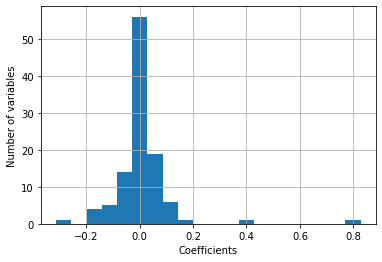

In [12]:
# and now let's plot the distribution of coefficients
pd.Series(sel_.estimator_.coef_.ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

As expected, some coefficients are positive and some are negative, suggesting that some features are negatively associated with the outcome (the more of the feature the less of the outcome) and viceversa.

However, the absolute value of the coefficients inform about the importance of the feature on the outcome, and not the sign. Therefore, the feature selection is done filtering on absolute values of coefficients. See below.

In [13]:
# the feature importance is informed by the absolute value of the coefficient, and not the sign.
# therefore, let's recalculate the mean using the absolute values instead
np.abs(sel_.estimator_.coef_).mean()

0.05690345475902068

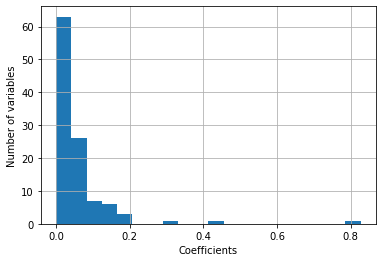

In [14]:
# and now let's plot the histogram of absolute coefficients
pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [15]:
# and now, let's compare the  number of selected features with the number of features which coefficient is above the
# mean coefficient, to make sure we understand the output of SelectFromModel
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
        np.sum( np.abs(sel_.estimator_.coef_) > np.abs( sel_.estimator_.coef_).mean())))

total features: 108
selected features: 33
features with coefficients greater than the mean coefficient: 33


Therefore, we see how select from model works. It will select all the coefficients which absolute values are greater than the mean.

To do this, you need to change the default value of the parameter threshold that can be passed to SelectFromModel. More details in the Scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

*********************************
*********************************
**********************************

## Linear Regression Coefficients

we repeat the feature selection based of variable coefficients returned by a linear model. This time on a regression scenario.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

In [17]:
data = pd.read_csv('../houseprice.csv')
data.shape

(1460, 81)

In [18]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers, and then you can assess how deterministic they are of the target
# here for simplicity I will use only numerical variables select numerical columns:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [20]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [21]:
# the features in the house dataset are in different scales so we train a scaler to scale them
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
# we train a Linear regression model and select features with higher coefficients.
# the LinearRegression object from sklearn is a non-regularised
# linear method. It fits by matrix multiplication and not  gradient descent.
# therefore we don't need to specify penalty and other parameters
sel_ = SelectFromModel(LinearRegression())
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LinearRegression())

In [23]:
# let's count the number of variables selected
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

7

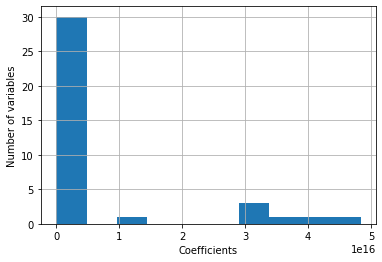

In [24]:
# and now let's plot the histogram of absolute coefficients
pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=10)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [25]:
# and now, let's compare the  amount of selected features with the amount of features which coefficient is above the
# mean coefficient, to make sure we understand the output of sklearn
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print( 'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum( np.abs(sel_.estimator_.coef_) > np.abs(  sel_.estimator_.coef_).mean())))

# Same as before, it selects those features which coefficient are greater than the mean of all feature coefficients.

total features: 37
selected features: 7
features with coefficients greater than the mean coefficient: 7


*************************
*************************
**************************

## Regression Coefficients are affected by regularisation

As mentioned previously, regularisation applies a penalty on the coefficients, in order to reduce their influence and create models that generalise better. This is very good to improve  model performance. However, it masks the true relationship between the predictor X and the outcome Y. Let's explore why.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [27]:
data = pd.read_csv('../dataset_2.csv')
print(data.shape)
data.head(1)

(50000, 109)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.53271,3.280834,17.982476,4.404259,2.34991,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417


In [28]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [29]:
# Let's fit a few logistic regression models with decreasing values for the penalty of the regularisation.
scaler = StandardScaler()
scaler.fit(X_train)
# we train 4 different models, decreasing the amount of regularisation (that is, increasing C)
# here we will store the coefficients of the variables fitted for each different model
coefs_df = []
# we train 4 different models with regularization
penalties = [0.00005, 0.0005, 0.005, 0.05, 0.5]
for c in penalties:       
    logit = LogisticRegression(C=c, penalty='l2', random_state=10, max_iter=300)
    logit.fit(scaler.transform(X_train), y_train)    
    # store the coefficients of the variables in a list
    coefs_df.append(pd.Series(logit.coef_.ravel()))

In [30]:
# now I create a dataframe with the coefficients for all the variables for the 4 different logistic regression models
coefs = pd.concat(coefs_df, axis=1)
coefs.columns = penalties
coefs.index = X_train.columns
coefs.head()

,0.00005,0.00050,0.00500,0.05000,0.50000
var_1,0.002746,0.005288,0.007366,0.011095,0.011643
var_2,-0.005650,-0.010763,-0.012708,-0.012864,-0.013314
var_3,0.000971,-0.002668,0.007178,0.061185,0.100871
var_4,0.001327,-0.002046,0.001087,0.020370,0.025914
var_5,0.002923,0.008070,0.025891,0.039421,0.042819


In [31]:
# apply log scale to the penalties (simplifies comparison)
coefs.columns = np.log(penalties)
coefs.head()

,-9.903488,-7.600902,-5.298317,-2.995732,-0.693147
var_1,0.002746,0.005288,0.007366,0.011095,0.011643
var_2,-0.005650,-0.010763,-0.012708,-0.012864,-0.013314
var_3,0.000971,-0.002668,0.007178,0.061185,0.100871
var_4,0.001327,-0.002046,0.001087,0.020370,0.025914
var_5,0.002923,0.008070,0.025891,0.039421,0.042819


Text(0.5, 1.0, 'Coefficient value vs penalty. Each line corresponds to one variable')

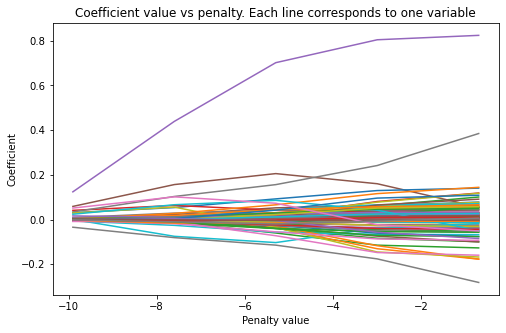

In [33]:
# plot the change in coefficients with the penalty
coefs.T.plot(figsize=(8,5), legend=False)
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty. Each line corresponds to one variable')

Text(0.5, 1.0, 'Coefficient value vs penalty')

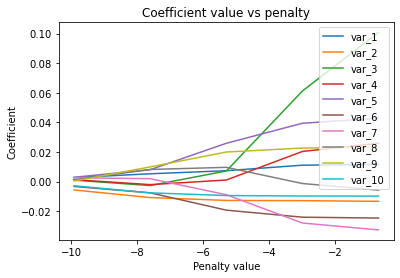

In [34]:
# now I will plot only the first 10 features for better visualisation
temp = coefs.head(10)
temp = temp.T
temp.plot(figsize=(6,4))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

We can see that the relation among the coefficients is complex. Some features show bigger coefficients than others without regularisation, but when the penalty increases this relationship changes.

Some other features are very important (show big coefficients) without regularisation, but with regularization their importance is similar to that of other features.

While this is not crucial to selet features, this is actually quite important when our aim is to understand the true relationship of a variable with the target. Or in other words, when we need to interpret and fully understand the outcome of the Linear Regression.

Text(0.5, 1.0, 'Coefficient value vs penalty')

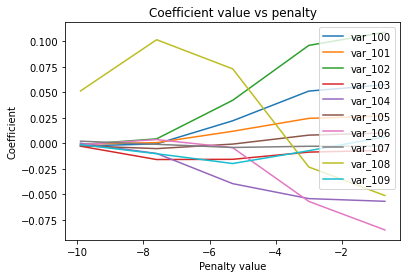

In [35]:
# plot another 10 features for visualisation
temp = coefs.tail(10)
temp = temp.T
temp.plot(figsize=(6,4))
plt.xlabel('Penalty value')
plt.ylabel('Coefficient')
plt.title('Coefficient value vs penalty')

Same as before, the relationship between features, as inferred from the coefficients, changes depending on the level of regularisation.

That is all for this demonstration, see you in the next one.

****************************
******************************
********************************

## Feature selection with linear models, review
### Putting it all together

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score

In [37]:
data = pd.read_csv('../dataset_1.csv')
print(data.shape)
data.head(1)

(50000, 301)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [39]:
# I keep a copy of the dataset with all the variables to compare the performance of machine learning models at the end of the notebook
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [40]:
# Remove constant features
constant_features = [ feat for feat in X_train.columns if X_train[feat].std() == 0]
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [42]:
# Remove quasi-constant features
# find features with low variance
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train)  

# how many not quasi-constant?
sum(sel.get_support()) 

215

In [43]:
features_to_keep = X_train.columns[sel.get_support()]

In [44]:
# remove the features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 215), (15000, 215))

In [45]:
# sklearn transformations lead to numpy arrays here we transform the arrays back to dataframes
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [46]:
# Remove duplicated features
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210


10

In [47]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 205), (15000, 205))

In [48]:
# I keep a copy of the dataset except constant, quasi-constant and duplicated variables

X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [49]:
# Remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  93


In [50]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [51]:
# keep a copy of the dataset without correlated features
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

# Select features by the regression coefficients

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [53]:
# we use regularisation by setting a low value of C
sel_ = SelectFromModel(  LogisticRegression(C=0.0005, random_state=10, max_iter=1000, penalty='l2'))
sel_.fit(scaler.transform(X_train), y_train)

# select features where coefficient is above the mean coefficient value and parse again as dataframe
# (remember that the output of sklearn is a numpy array)

X_train_coef = pd.DataFrame(sel_.transform(X_train))
X_test_coef = pd.DataFrame(sel_.transform(X_test))
# add the columns name
X_train_coef.columns = X_train.columns[(sel_.get_support())]
X_test_coef.columns = X_train.columns[(sel_.get_support())]

In [54]:
X_train_coef.shape, X_test_coef.shape

((35000, 28), (15000, 28))

### Compare the performance in machine learning algorithms

In [55]:
# create a function to train a logistic regression  and compare its performance in the train and test sets
def run_logistic(X_train, X_test, y_train, y_test): 
    scaler = StandardScaler().fit(X_train)
    
    logit = LogisticRegression(C=0.0005, random_state=10, max_iter=10000, penalty='l2')
    logit.fit(scaler.transform(X_train), y_train)   
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [56]:
# original dataset - all variables
run_logistic(X_train_original, X_test_original, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7844213790053062
Test set
Logistic Regression roc-auc: 0.7825685631204591


In [57]:
# filter methods - basic
run_logistic(X_train_basic_filter, X_test_basic_filter, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7841215084117658
Test set
Logistic Regression roc-auc: 0.7823687162836174


In [58]:
# filter methods - correlation
run_logistic(X_train_corr, X_test_corr, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7775268841746482
Test set
Logistic Regression roc-auc: 0.7760748408318285


In [59]:
# embedded methods - Logistic regression coefficients
run_logistic(X_train_coef, X_test_coef, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7754621344319395
Test set
Logistic Regression roc-auc: 0.7719805239762513


We see that a model with 28 features performs almost as well as a model trained with all the 215 variables!